# EDA

## Importing the Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('FAOSTAT_data_2.csv')

In [3]:
df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,40,Austria,5610,Import Quantity,1270,Mushrooms and truffles,1961,1961,tonnes,30.0,A,Official figure
1,TCL,Crops and livestock products,40,Austria,5610,Import Quantity,1270,Mushrooms and truffles,1962,1962,tonnes,153.0,A,Official figure
2,TCL,Crops and livestock products,40,Austria,5610,Import Quantity,1270,Mushrooms and truffles,1963,1963,tonnes,173.0,A,Official figure
3,TCL,Crops and livestock products,40,Austria,5610,Import Quantity,1270,Mushrooms and truffles,1964,1964,tonnes,218.0,A,Official figure
4,TCL,Crops and livestock products,40,Austria,5610,Import Quantity,1270,Mushrooms and truffles,1965,1965,tonnes,224.0,A,Official figure


We can see that most of the attributes are not necessary for our calculations and they can be removed without penalty to our models.

In [4]:
df.drop(["Domain Code", "Domain", "Area Code (M49)", "Element Code", "Item Code (CPC)", "Year Code", "Flag", "Unit", "Flag Description"], inplace = True, axis = 1)

In [5]:
df.head()

,Area,Element,Item,Year,Value
0,Austria,Import Quantity,Mushrooms and truffles,1961,30.0
1,Austria,Import Quantity,Mushrooms and truffles,1962,153.0
2,Austria,Import Quantity,Mushrooms and truffles,1963,173.0
3,Austria,Import Quantity,Mushrooms and truffles,1964,218.0
4,Austria,Import Quantity,Mushrooms and truffles,1965,224.0


In [6]:
df['Element'].unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

The column Element consists of 4 attributes, import Quantity, Import Value, Export Quantity and Export Value. 
I will need to unpivot the table to present these attributes as columns.

In [7]:
df_unpivot = df.pivot(index = ['Area', 'Item', 'Year'] , columns = ['Element'])

In [8]:
df_unpivot.head()

Value               \
Element                             Export Quantity Export Value   
Area    Item                   Year                                
Austria Mushrooms and truffles 1961          1088.0       1012.0   
                               1962          1601.0       1192.0   
                               1963           946.0        760.0   
                               1964          1796.0       1998.0   
                               1965          2132.0       2473.0   

                                                                  
Element                             Import Quantity Import Value  
Area    Item                   Year                               
Austria Mushrooms and truffles 1961            30.0         23.0  
                               1962           153.0        118.0  
                               1963           173.0        132.0  
                               1964           218.0        168.0  
                               1965           224.0        180.0

Unpivot the table will add another Index, to be able to use the table I needed to reindex the table

In [9]:
df_unpivot = df_unpivot['Value'].reset_index()

We also need to clear the Element index column created on the unpivot step

In [10]:
df_unpivot.columns.name = None

In [11]:
df_unpivot.head()

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value
0,Austria,Mushrooms and truffles,1961,1088.0,1012.0,30.0,23.0
1,Austria,Mushrooms and truffles,1962,1601.0,1192.0,153.0,118.0
2,Austria,Mushrooms and truffles,1963,946.0,760.0,173.0,132.0
3,Austria,Mushrooms and truffles,1964,1796.0,1998.0,218.0,168.0
4,Austria,Mushrooms and truffles,1965,2132.0,2473.0,224.0,180.0


## Data Cleaning 

In [12]:
df_unpivot.shape

(1348, 7)

#### Analyze missing data

Before starting the Analyses of the data, I will perform the Cleaning and work the Null Values, Zero Values could be considered no Export or import of the selected type for that year

In [13]:
df_unpivot.isnull().sum()

Area                 0
Item                 0
Year                 0
Export Quantity    124
Export Value        94
Import Quantity     34
Import Value        34
dtype: int64

I will Analyse the Nulls to understand if they can be removed or if they need to be updated to a different value.

In [14]:
df_unpivot.loc[(df_unpivot['Export Quantity'].isnull() == True)]

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value
122,Bulgaria,Mushrooms and truffles,1961,NaN,NaN,0.0,0.0
123,Bulgaria,Mushrooms and truffles,1962,NaN,NaN,0.0,0.0
124,Bulgaria,Mushrooms and truffles,1963,NaN,NaN,0.0,0.0
125,Bulgaria,Mushrooms and truffles,1964,NaN,NaN,0.0,0.0
126,Bulgaria,Mushrooms and truffles,1965,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
1130,Romania,Mushrooms and truffles,1985,NaN,0.0,0.0,0.0
1131,Romania,Mushrooms and truffles,1986,NaN,0.0,0.0,0.0
1132,Romania,Mushrooms and truffles,1987,NaN,0.0,0.0,0.0
1133,Romania,Mushrooms and truffles,1988,NaN,0.0,0.0,0.0


In [15]:
df_unpivot.loc[(df_unpivot['Export Quantity'].isnull() == True)]["Area"].unique()

array(['Bulgaria', 'Cyprus', 'Latvia', 'Malta', 'Romania'], dtype=object)

In [16]:
df_unpivot.loc[df_unpivot['Import Quantity'].isnull() == True]

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value
780,Latvia,Mushrooms and truffles,1992,NaN,0.0,NaN,0.0
810,Lithuania,Mushrooms and truffles,1992,470.0,3000.0,NaN,NaN
811,Lithuania,Mushrooms and truffles,1993,1600.0,9800.0,NaN,NaN
984,Poland,Mushrooms and truffles,1961,3908.0,3145.0,NaN,NaN
985,Poland,Mushrooms and truffles,1962,5742.0,4520.0,NaN,NaN
986,Poland,Mushrooms and truffles,1963,2305.0,2126.0,NaN,NaN
987,Poland,Mushrooms and truffles,1964,1537.0,1464.0,NaN,NaN
988,Poland,Mushrooms and truffles,1965,4991.0,4855.0,NaN,NaN
989,Poland,Mushrooms and truffles,1966,4926.0,4189.0,NaN,NaN
990,Poland,Mushrooms and truffles,1967,6601.0,5452.0,NaN,NaN


I will check the total Export Quantities and compare with the sum of the Export Quantitites with Null Import Quantities.

In [17]:
# Get the sum of the Export Quantities where the import Quantity is Null 
df_unpivot.loc[df_unpivot['Import Quantity'].isnull() == True]['Export Quantity'].sum()

103428.0

In [18]:
# Get the sum of the total Export Quantities
df_unpivot['Export Quantity'].sum()

10202611.84

Based on the Countries of the Nulls we can safelly remove the rows with Nulls. As Ireland and Netherlands are the two countries we will use on our models, and the amount of Export or Import Quantities found is relativelly small compared to the total amounts (~1%)

In [19]:
df_clean = df_unpivot.dropna()

In [20]:
df_clean.head()

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value
0,Austria,Mushrooms and truffles,1961,1088.0,1012.0,30.0,23.0
1,Austria,Mushrooms and truffles,1962,1601.0,1192.0,153.0,118.0
2,Austria,Mushrooms and truffles,1963,946.0,760.0,173.0,132.0
3,Austria,Mushrooms and truffles,1964,1796.0,1998.0,218.0,168.0
4,Austria,Mushrooms and truffles,1965,2132.0,2473.0,224.0,180.0


In [21]:
df_clean.isnull().sum()

Area               0
Item               0
Year               0
Export Quantity    0
Export Value       0
Import Quantity    0
Import Value       0
dtype: int64

## EDA

After Cleaning the data, I will check the basic information of the final Table

In [22]:
df_clean.shape

(1190, 7)

In [23]:
df_clean.dtypes

Area                object
Item                object
Year                 int64
Export Quantity    float64
Export Value       float64
Import Quantity    float64
Import Value       float64
dtype: object

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 0 to 1347
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             1190 non-null   object 
 1   Item             1190 non-null   object 
 2   Year             1190 non-null   int64  
 3   Export Quantity  1190 non-null   float64
 4   Export Value     1190 non-null   float64
 5   Import Quantity  1190 non-null   float64
 6   Import Value     1190 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 74.4+ KB


In [140]:
columns = list(df_clean.columns)
columns.remove('Year')
df_clean[columns].describe()

,Export Quantity,Export Value,Import Quantity,Import Value
count,1190.000000,1190.000000,1190.000000,1190.000000
mean,8486.679697,22410.628571,5961.944462,16454.353782
std,27193.813632,58701.593051,12944.721504,36524.013972
min,0.000000,0.000000,0.000000,0.000000
25%,90.000000,333.500000,112.000000,188.250000
50%,780.000000,2557.000000,1000.000000,2506.500000
75%,3733.250000,17409.000000,5246.020000,14362.250000
max,255944.110000,527360.000000,98130.350000,267439.000000


In [26]:
df_clean.describe(include = "object")

,Area,Item
count,1190,1190
unique,28,1
top,Austria,Mushrooms and truffles
freq,61,1190


Check for Duplicated rows 

In [27]:
df_clean.duplicated().sum()

0

#### Correlation

In [28]:
df_clean.corr()

,Year,Export Quantity,Export Value,Import Quantity,Import Value
Year,1.000000,0.223330,0.289280,0.322317,0.328925
Export Quantity,0.223330,1.000000,0.968302,0.152916,0.114346
Export Value,0.289280,0.968302,1.000000,0.226848,0.199226
Import Quantity,0.322317,0.152916,0.226848,1.000000,0.975438
Import Value,0.328925,0.114346,0.199226,0.975438,1.000000


In [146]:
def title(title):
    plt.title(f'{title}', fontdict={'fontsize':18},    pad=14);

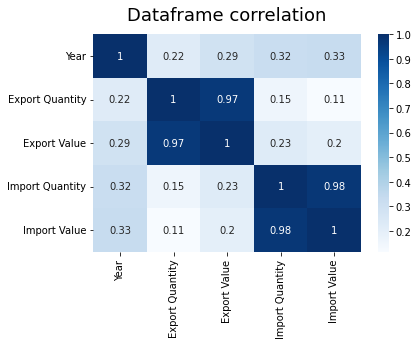

In [29]:
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True);
title('Dataframe correlation');

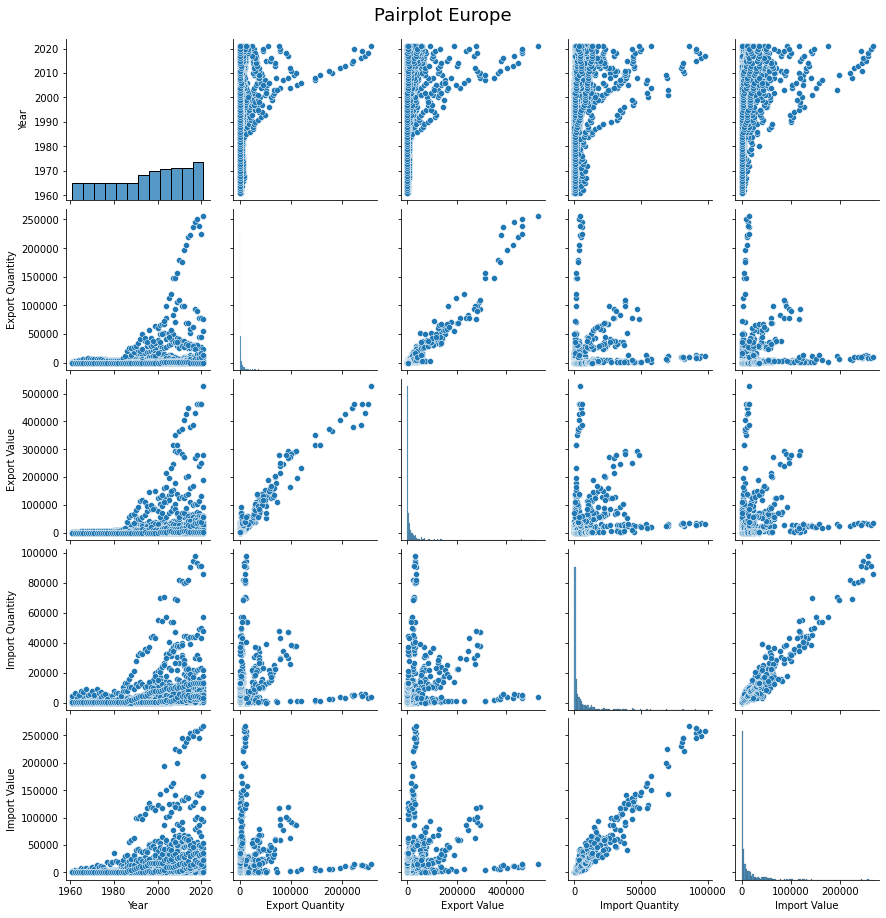

In [30]:
g = sns.pairplot(df_clean);
g.fig.suptitle("Pairplot Europe", y=1.02, fontsize = 18);

#### Bar Charts

I will look for the top three exporters of Mushrooms and  Truffles

In [88]:
df_topexporters  = df_clean[['Area','Export Quantity']]
df_topexporters = df_topexporters.groupby(df_topexporters['Area'])['Export Quantity'].sum()
df_topexporters = df_topexporters.to_frame()
df_topexporters = df_topexporters.sort_values(['Export Quantity'], ascending=False)
df_topexporters = df_topexporters.reset_index()

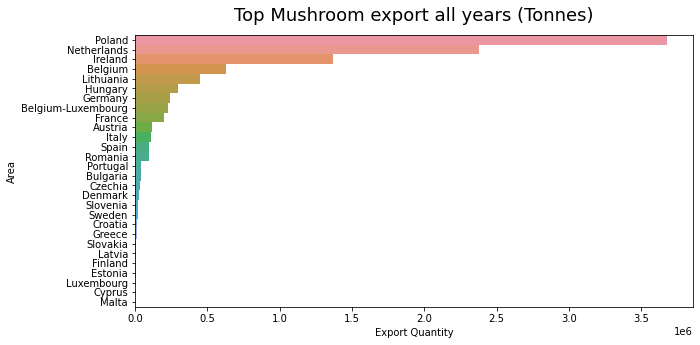

In [141]:
plt.subplots(figsize=(10, 5))
sns.barplot(data = df_topexporters, y = "Area" , x = "Export Quantity", orient = "h" ,errorbar = None, width = 1);
title('Top Mushroom export all years (Tonnes)');

Based on the Analyses of total export per country, Poland is way ahead than the others and it would distort the analyses. So I have picked the next three countries to conduct our Analysis; Netherlands, Belgium and Ireland  

In [97]:
# I will separate the three main exporters in a separate Dataframe
df_main = df_clean.loc[df_clean['Area'].isin(['Ireland', 'Belgium', 'Netherlands'])]

In [143]:
df_allyears = df_clean.loc[df_clean['Area'].isin(['Ireland', 'Belgium', 'Netherlands'])]

#### Histograms

In [33]:
def histquantity(Country):
    ax = sns.histplot((df_clean.loc[df_clean['Area'] == Country]['Export Quantity']), kde = True);
    ax.set(xlabel='Quantity(Tons)', ylabel='Export Quantity', title =f'Export Histogram {Country}');
    

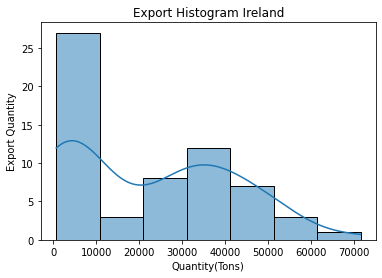

In [34]:
histquantity('Ireland')

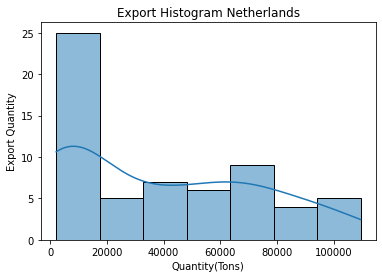

In [35]:
histquantity('Netherlands')

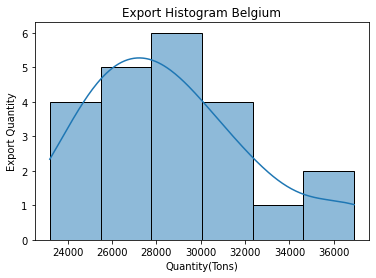

In [36]:
histquantity('Belgium')

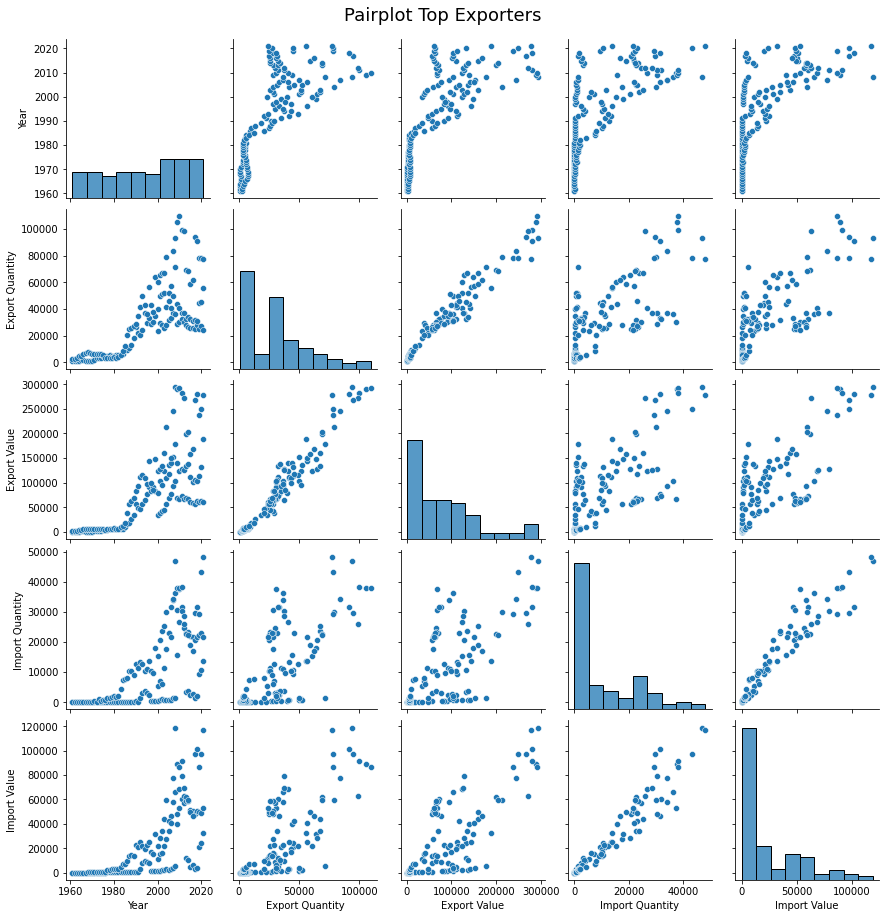

In [98]:
g = sns.pairplot(df_main);
g.fig.suptitle("Pairplot Top Exporters", y=1.02, fontsize = 18);

In [53]:
def pairplotmain(Country):
    g = sns.pairplot(df_main.loc[df_main['Area'] == Country]);
    g.fig.suptitle(f'Pairplot {Country}', y=1.02, fontsize = 18);

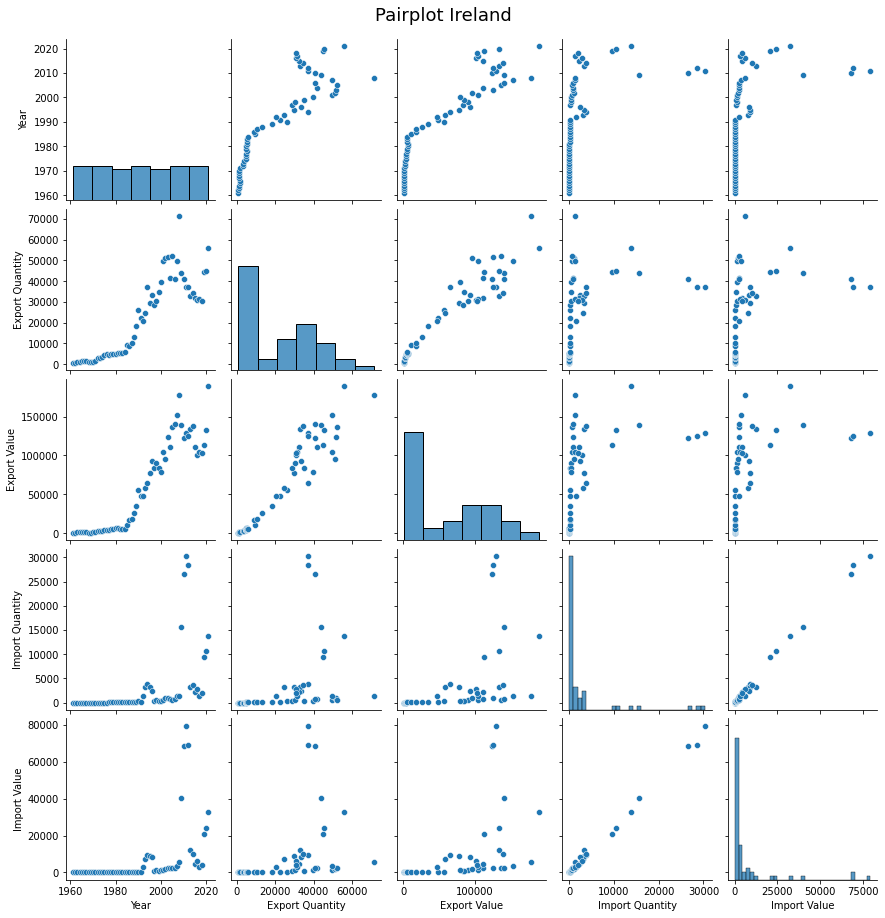

In [54]:
pairplotmain('Ireland')

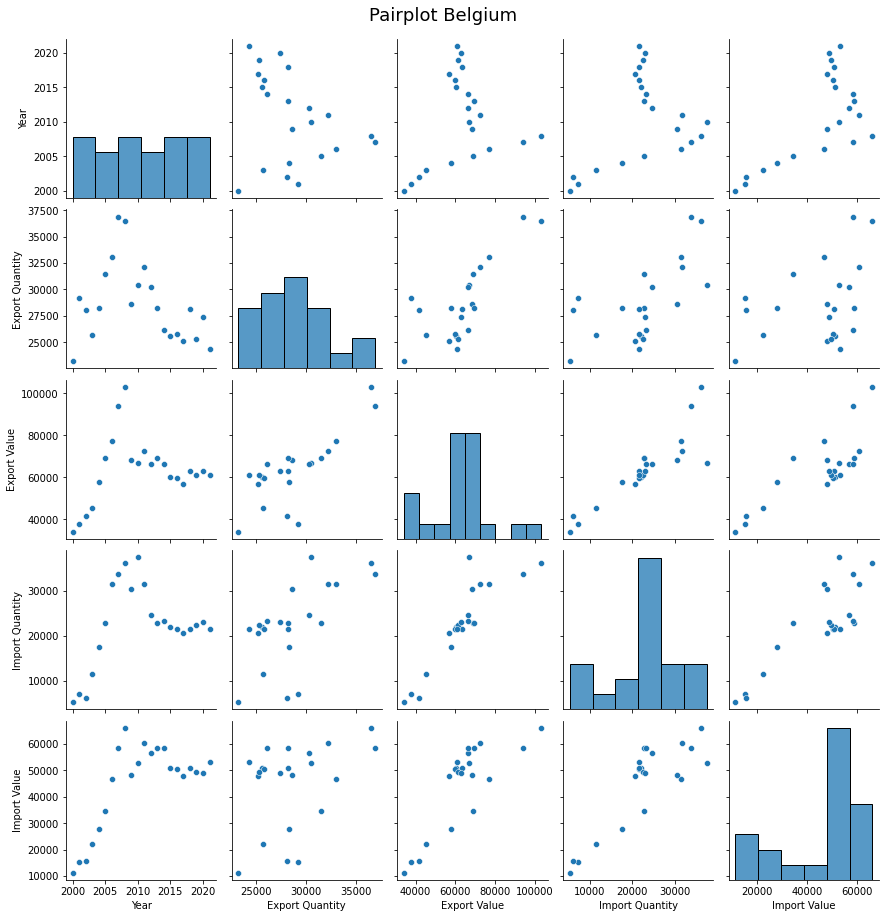

In [55]:
pairplotmain('Belgium')

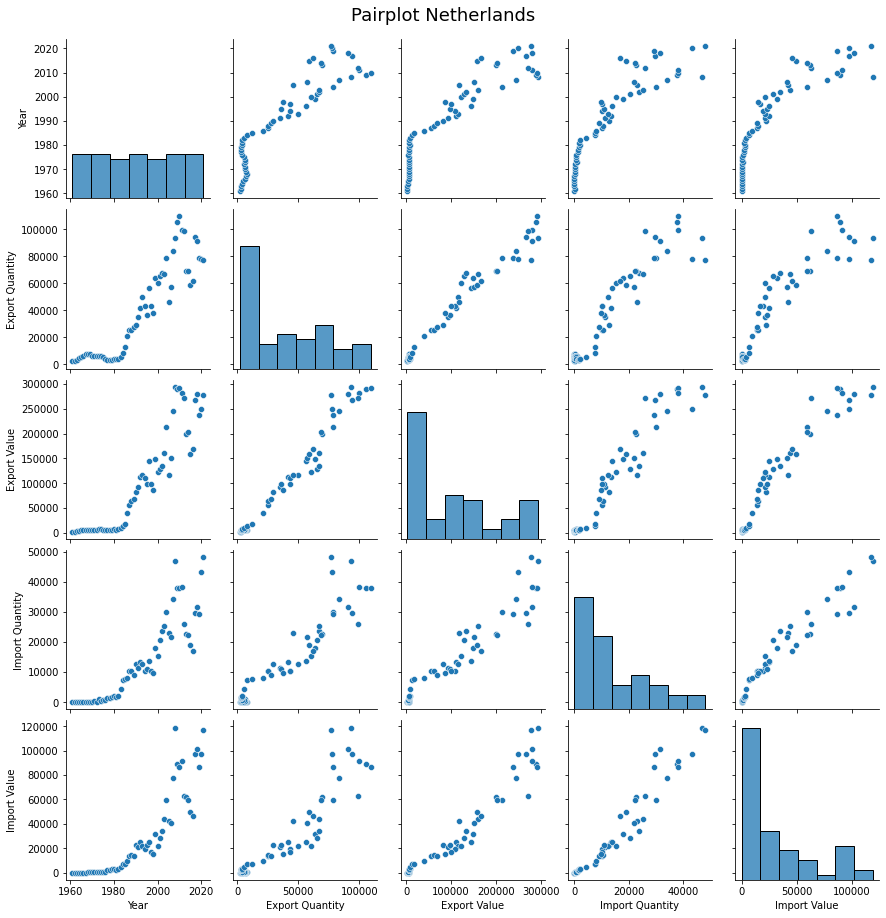

In [56]:
pairplotmain('Netherlands')

#### Line chart

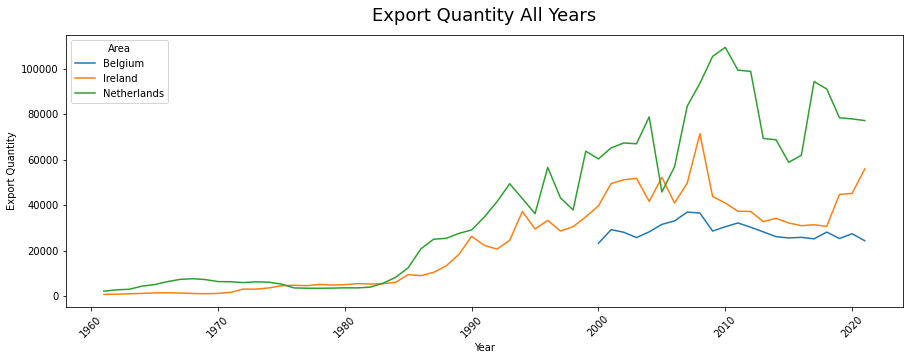

In [144]:
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(data = df_allyears ,x="Year", y="Export Quantity", hue = 'Area', errorbar=None);
ax.tick_params(axis='x', labelrotation = 45)
title('Export Quantity All Years')
plt.show();

Based on the Line chart above, we only have data for Belgium from 2000 onwards so I have limited the dataframe to data from 2000 only.

Select the sample consisting of data from 2000 onwards 

In [102]:
df_main = df_main.loc[df_main['Year'] >= 2000]

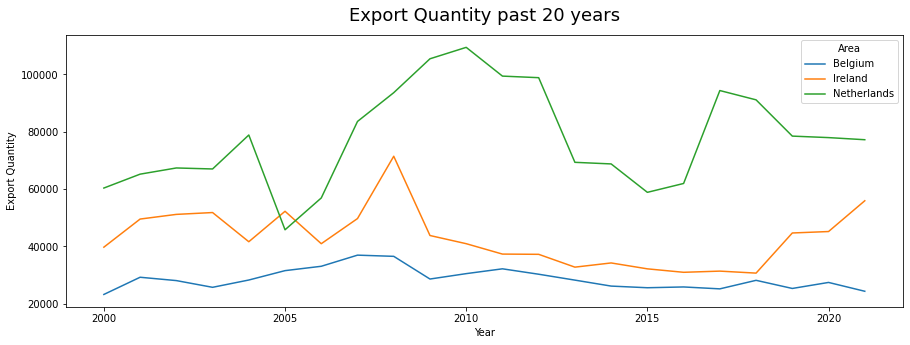

In [120]:
fig, bx = plt.subplots(figsize=(15, 5))
bx = sns.lineplot(data = df_main.loc[df_main['Year'] >= 2000] ,x="Year", y="Export Quantity", hue = 'Area', errorbar=None);
title('Export Quantity past 20 years')
plt.show();

#### Boxplots and Outliers

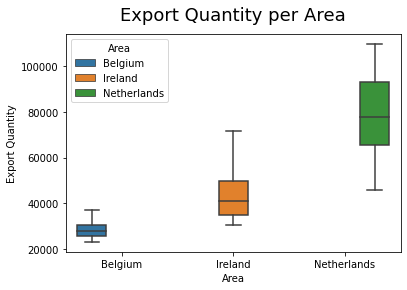

In [148]:
sns.boxplot(x = 'Area', y ='Export Quantity', data = df_main, hue = 'Area');
title('Export Quantity per Area');

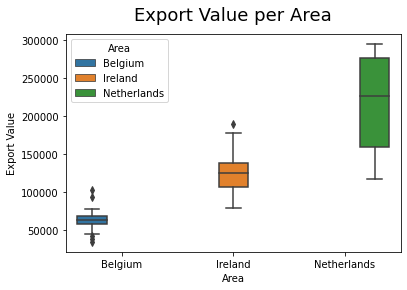

In [151]:
sns.boxplot(x = 'Area', y ='Export Value', data = df_main, hue = 'Area');
title('Export Value per Area');

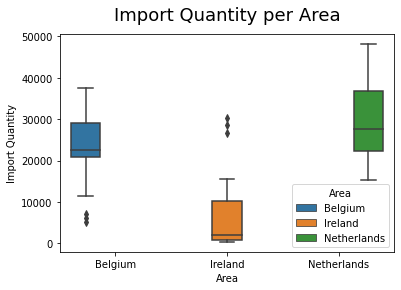

In [149]:
sns.boxplot(x = 'Area', y ='Import Quantity', data = df_main, hue = 'Area');
title('Import Quantity per Area');

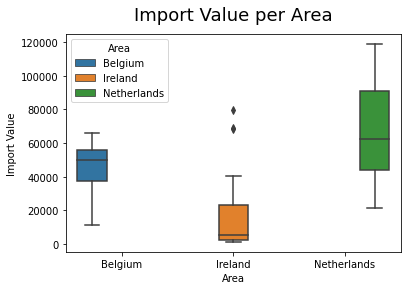

In [152]:
sns.boxplot(x = 'Area', y ='Import Value', data = df_main, hue = 'Area');
title('Import Value per Area');

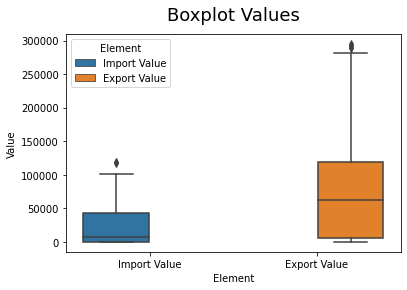

In [130]:
sns.boxplot(x = 'Element', y ='Value', data = df.loc[(df['Element'].isin(['Export Value','Import Value'])) & (df['Area'].isin(['Ireland', 'Belgium', 'Netherlands']))], hue = 'Element');
title('Boxplot Values');

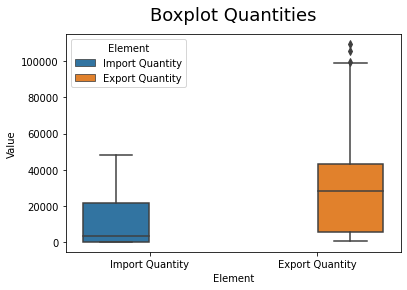

In [131]:
sns.boxplot(x = 'Element', y ='Value', data = df.loc[(df['Element'].isin(['Export Quantity','Import Quantity'])) & (df['Area'].isin(['Ireland', 'Belgium', 'Netherlands']))], hue = 'Element');
title('Boxplot Quantities');

#### Adding unit price to the dataframe

Based on the export/import quantity (Tonnes) and the export/import value (1000 USD) we can calculate the Tonne price per year.
I will add these columns to the dataframe

In [103]:
df_main['Export Unit Price (USD)'] = (df_main['Export Value']/df_main['Export Quantity'])*1000

In [105]:
df_main['import Unit Price (USD)'] = (df_main['Import Value']/df_main['Import Quantity'])*1000

In [106]:
df_main.head()

,Area,Item,Year,Export Quantity,Export Value,Import Quantity,Import Value,Export Unit Price (USD),import Unit Price (USD)
61,Belgium,Mushrooms and truffles,2000,23198.0,34246.0,5252.0,11328.0,1476.247952,2156.892612
62,Belgium,Mushrooms and truffles,2001,29201.0,37788.0,7135.0,15176.0,1294.065272,2126.979678
63,Belgium,Mushrooms and truffles,2002,28034.0,41794.0,6116.0,15633.0,1490.832560,2556.082407
64,Belgium,Mushrooms and truffles,2003,25688.0,45242.0,11474.0,22121.0,1761.211461,1927.924002
65,Belgium,Mushrooms and truffles,2004,28234.0,57678.0,17494.0,27910.0,2042.856131,1595.404139


In [112]:
df_avg_price = df_main[['Year', 'Export Unit Price (USD)' ,'import Unit Price (USD)']].groupby(['Year'], as_index=False).mean()

In [115]:
df_avg_melted = df_avg_price.melt('Year', var_name='Export_Import', value_name='vals')

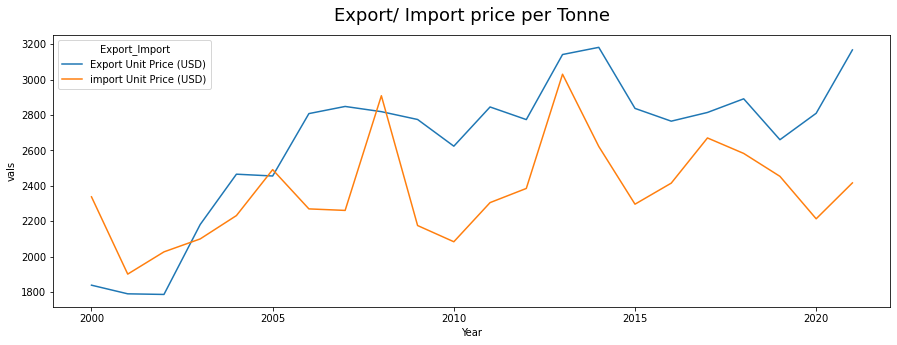

In [150]:
fig, cx = plt.subplots(figsize=(15, 5))
cx = sns.lineplot(data = df_avg_melted ,x="Year", y= 'vals', hue = 'Export_Import', errorbar=None);
title('Export/ Import price per Tonne')
plt.show();

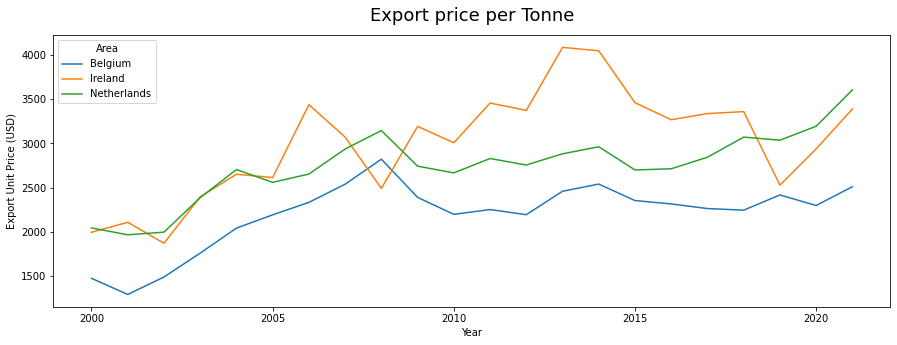

In [164]:
    fig, cx = plt.subplots(figsize=(15, 5))
    cx = sns.lineplot(data = df_main ,x="Year", y= 'Export Unit Price (USD)', hue = 'Area', errorbar=None);
    title(f'Export price per Tonne')
    plt.show();

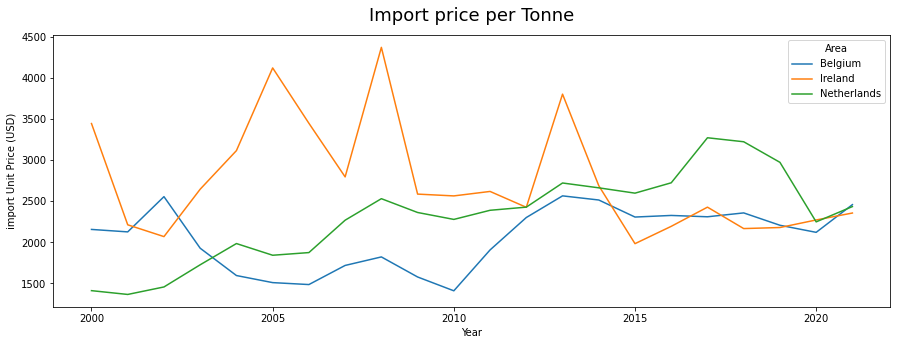

In [167]:
    fig, cx = plt.subplots(figsize=(15, 5))
    cx = sns.lineplot(data = df_main ,x="Year", y= 'import Unit Price (USD)', hue = 'Area', errorbar=None);
    title(f'Import price per Tonne')
    plt.show();

Export the Main dataframe to be used at Statistics and Machine Learning notebooks

In [123]:
df_main.to_csv('df_main.csv')

## Interactive Dashboard